In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<14:11:08> Checking library dependencies ...
<14:11:08> Using the following libraries:
<14:11:08> 	scipy (v0.18.0)
<14:11:08> 	statsmodels (v0.6.1)
<14:11:08> 	scikit-learn (v0.17.1)
<14:11:08> 	seaborn (v0.7.1)
<14:11:08> 	rpy2 (v2.8.2)
<14:11:08> 	pandas (v0.18.1)
<14:11:08> 	matplotlib (v1.5.1)
<14:11:08> 	numpy (v1.11.1)
<14:11:08> Planted a random seed 20121020.


# Get states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
nclustering = 500
filename_prefix = 'output/ccle_hema_k_9_H_1000clustering_0828'

In [3]:
# labels, memberships, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename_prefix=filename_prefix)

# Map Onco-GPS

In [4]:
labels = pd.read_csv(filename_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filename_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

<14:11:56> Creating Onco-GPS with 166 samples, 9 components, and 10 states [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ...


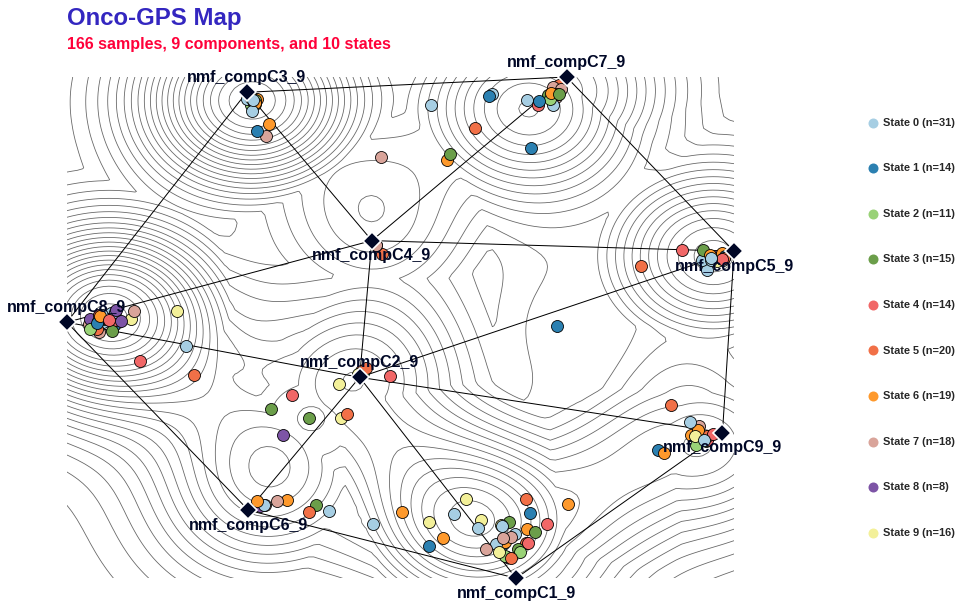

<14:11:58> Creating Onco-GPS with 166 samples, 9 components, and 10 states [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ...
-1.6972264494 -3.1969072636796674e-16 1.77700398951 3.4742304389


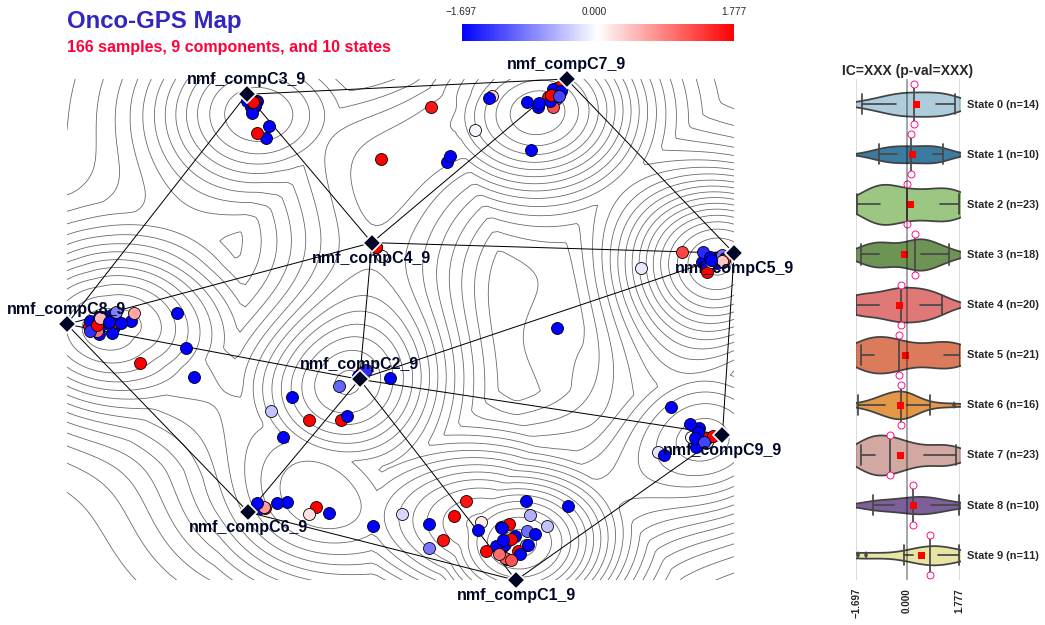

<14:11:59> Creating Onco-GPS with 166 samples, 9 components, and 10 states [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ...
0 2 4 4


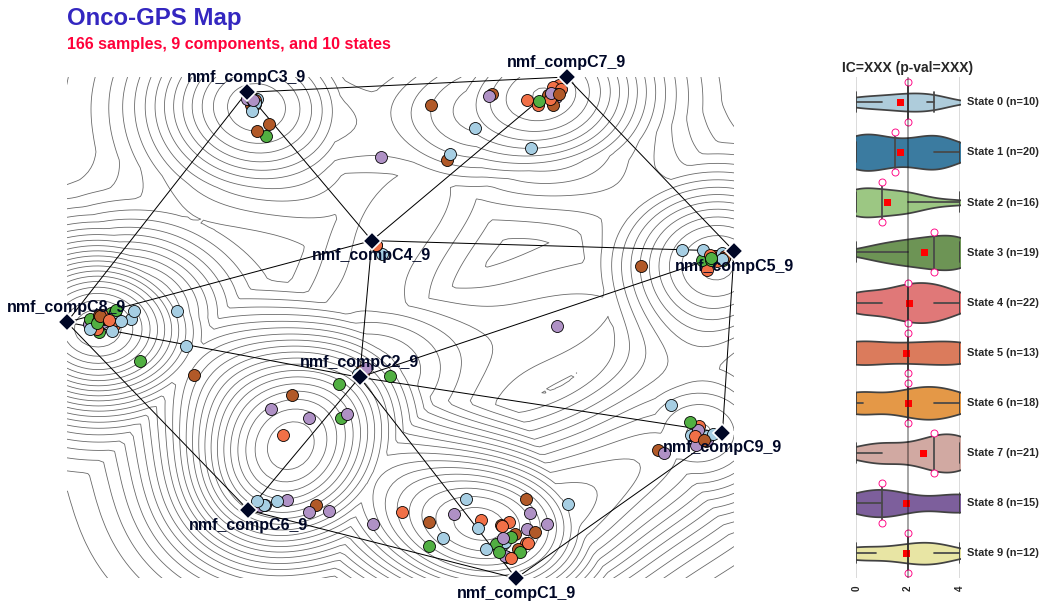

[1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1]
<14:12:01> Creating Onco-GPS with 166 samples, 9 components, and 10 states [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ...
0 0 1 1


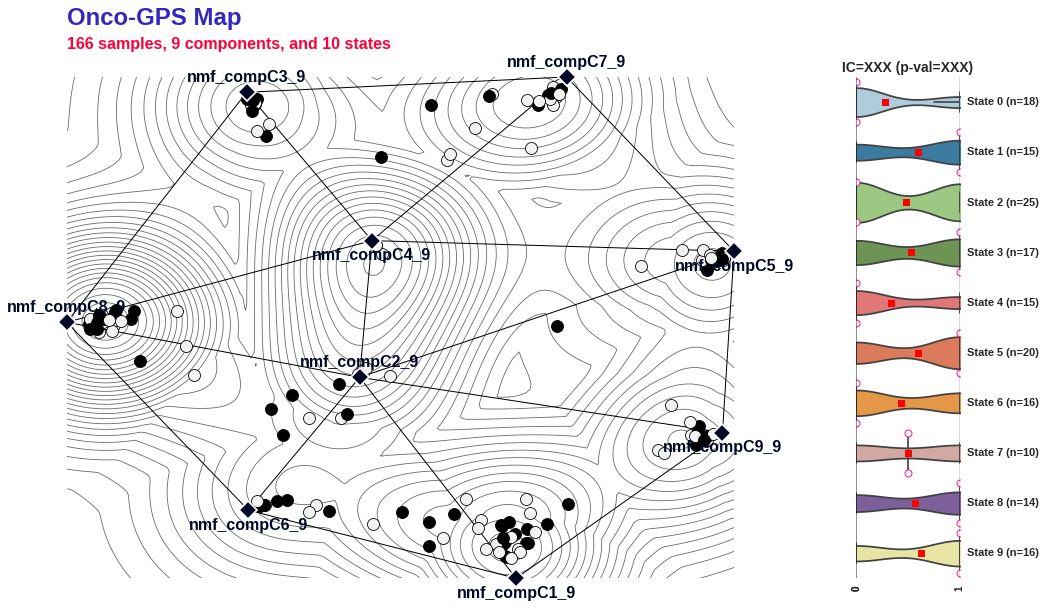

In [6]:
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]))
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.random_sample(h.shape[1]))
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.choice(range(5), h.shape[1]),
                             annotation_type='categorical')
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.choice(range(2), h.shape[1]),
                             annotation_type='binary')

<14:11:08> Creating Onco-GPS with 166 samples, 9 components, and 3 states [1, 2, 3] ...
-1.72809041321 5.283591502734178e-16 1.75800412006 3.48609453327


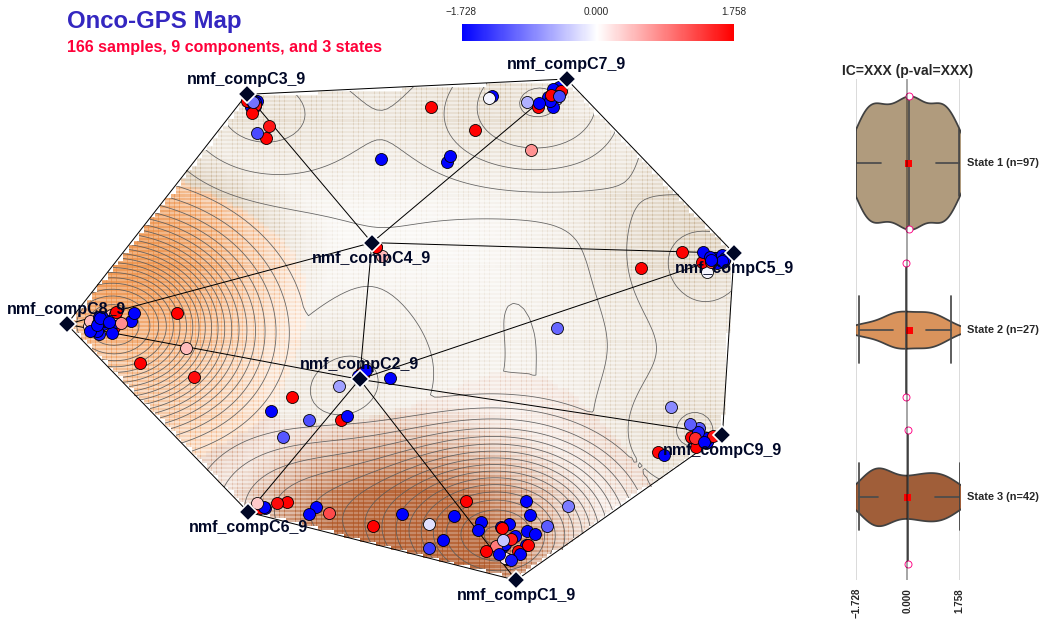

<14:11:31> Creating Onco-GPS with 166 samples, 9 components, and 4 states [1, 2, 3, 4] ...
-1.72809041321 5.283591502734178e-16 1.75800412006 3.48609453327


KeyboardInterrupt: 

In [5]:
for n_state in n_states_to_explore:
    states = labels.ix[n_state, :-1].astype(int).tolist()
#     signature = ''
#     ccal.visualize.plot_onco_gps(h, states, mds_is_metric=True, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'populate_random'
    ccal.visualize.plot_onco_gps(h, states, annotations=annotations, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))